In [76]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [77]:
class LinearRegression:
    def __init__(self, random_state):
        np.random.seed(random_state)
        self.last_x = None
        self.last_y = None
        self.last_w0 = None
        self.last_w1 = None
        self.loss_function_type = None
        self.eta = None
        self.epochs = None

    def predict(self, x, y, eta, epochs, loss_function_type="mse") -> tuple:
        self.last_x = x
        self.last_y = y
        self.last_loss_function_type = loss_function_type
        self.eta = eta
        self.epochs = epochs
        
        self.el=[]
        w0 = np.random.randint(-100, 100)
        w1 = np.random.randint(-100, 100)
        print(f"start: {w1:.2f}* x + {w0:.2f}  ")
        for epoch in range(epochs):
            yhat = w1 * x + w0

            # mse
            if loss_function_type == "mse":
                e = np.mean((yhat - y) ** 2)
            # mae
            elif loss_function_type == "mae":
                e = np.mean(np.abs(yhat - y))
            else:
                raise Exception(f"Not implemented loss function: {loss_function_type}")
            self.el.append(e)
            if loss_function_type == "mse":
                grad_w0 = 2 * np.mean(yhat - y)
                grad_w1 = 2 * np.mean(x * (yhat - y))
            elif loss_function_type == "mae":
                # I'm not sure
                grad_w0 = np.mean((yhat - y) / (np.abs((yhat - y))) * 1)
                grad_w1 = np.mean((yhat - y) / (np.abs((yhat - y))) * x)

            w0 -= eta * grad_w0
            w1 -= eta * grad_w1


        yhat = w1 * x + w0
        # mse
        if loss_function_type == "mse":
            e = np.mean((yhat - y) ** 2)
        # mae
        elif loss_function_type == "mae":
            e = np.mean(np.abs(yhat - y))
        else:
            raise Exception(f"Not implemented loss function: {loss_function_type}")
        self.el.append(e)
        self.last_w0 = w0
        self.last_w1 = w1
        print(f"end: {w1:.2f}* x + {w0:.2f}  ")
        return w1, w0, e

    def plot_predict(self):
        # if not self.last_x:  # ....
        #     return False
        
        
        fig, axes = plt.subplots(1, 2, figsize=(13, 4))
        
        axes[0].scatter(
            self.last_x,
            self.last_y,
            c="blue",
            s=2,
        )
        # x_min=min(self.last_x)
        # x_max=max(self.last_x)
        # xn=np.linspace(x_min,x_max,1000)
        yhat = self.last_w1 * self.last_x + self.last_w0
        axes[0].plot(
            self.last_x,
            yhat,
            c="red",
            label=f"{self.last_w1:.2f}* x + {self.last_w0:.2f}  #{self.last_loss_function_type.upper()},{self.eta},{self.epochs}",
        )
        # plt.text(0.5, 0.5, s=f"{self.last_loss_function_type.upper()}", c="red")
        # plt.text(1, .2, s=f"{self.last_w1:.2f}* x + {self.last_w0:.2f}", c="green")       
    
        axes[0].legend()
        
        
        axes[1].plot(self.el,label=f"err:{self.el[-1]:.2f}")
        axes[1].legend()
        plt.show()
    
        

In [78]:
x,y = datasets.make_regression(n_samples=100,n_features=1,n_targets=1,noise=20,random_state=4)
if x.ndim > 1:  # Check if x is already 1D
    x = x.flatten() 
x.shape,y.shape

((100,), (100,))

start: 25.00* x + -91.00  
end: 75.38* x + -1.96  


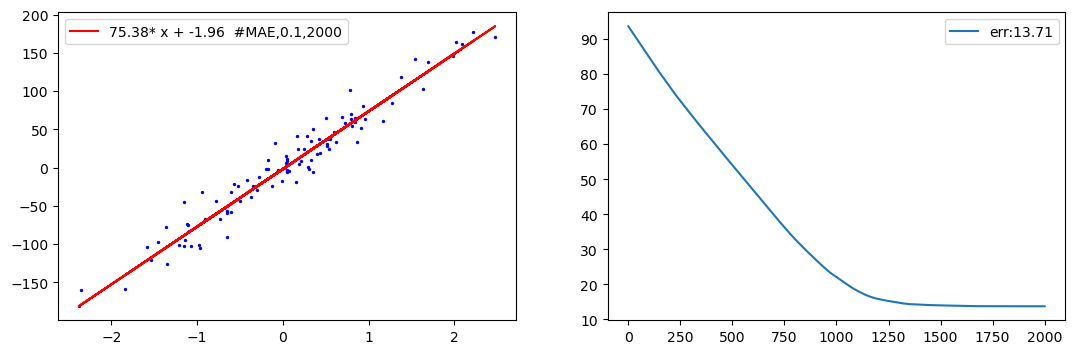

In [79]:
eta=.1
epochs=2000

lr=LinearRegression(random_state=10)
res=lr.predict(x,y,eta,epochs,loss_function_type="mae")
res
lr.plot_predict()


start: 25.00* x + -91.00  
end: 74.93* x + -0.43  


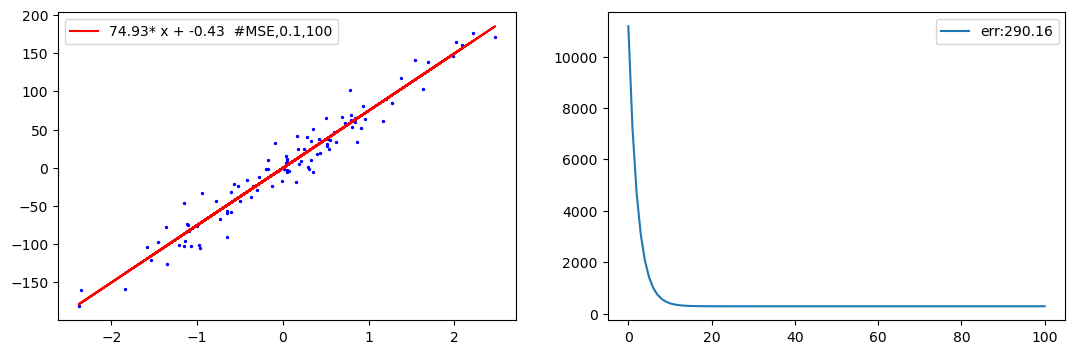

In [80]:
eta=0.1
epochs=100

lr=LinearRegression(random_state=10)
res=lr.predict(x,y,eta,epochs,loss_function_type="mse")
res
lr.plot_predict()
